# Auswertung O10 - Linsensysteme

Santiago R. - 22.3.2021

In [286]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## 0. Messwerte

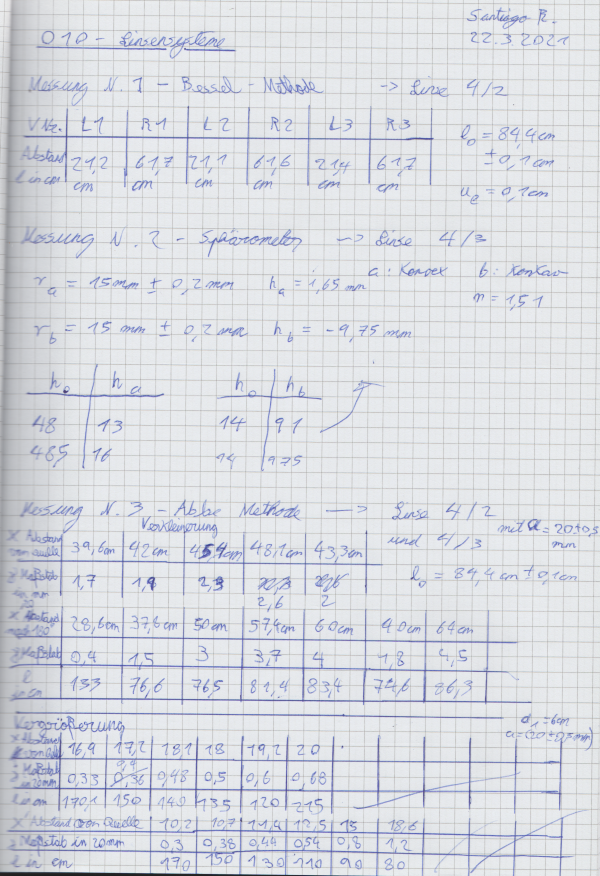

In [287]:
from IPython.display import Image
Image(filename='Messwerte.png') 

In [288]:
#Besselmethode
R = np.array([61.7,61.6,61.7])
L = np.array([21.2,21.1,21.4])
l_0 = 84.4
u_l = 0.1

In [289]:
#Sphärometer
r_0 = 1.5
n_0 = 1.51
h_konvex = 0.165
h_konkav = -0.975

In [290]:
#Methode nach Abbe
x = np.array([16.9,17.2,18.1,18,19.2,20,39.6,42,45.4,48.1,43.3])
gamma = np.array([0.33,0.4,0.48,0.5,0.6,0.68,1.7,1.9,2.3,2.6,2])
x_invers = np.array([10.2,10.7,11.4,12.5,15,18.6,50,57.4,60,64])
gamma_invers = np.array([0.3,0.38,0.44,0.54,0.8,1.2,3,3.7,4,4.5])

# Bessel-Methode

Man berechne die Brennweite einer Linse mithilfe zweier Positionen $x_1$ und $x_2$, bei denen diese ein scharfes Bild erzeugt, als <br>
$f = \frac{l^2-|x_1-x_2|^2}{4l}$ <br>
wobei l den Schirmabstand an der das Bild entsteht von der Quelle angibt. Für die Unsicherheit gilt dann <br>
$u_f = \sqrt{\left(\frac{(x_1-x_2)^2(u_{x_1}^2+u_{x_2}^2)}{4 l^2}\right)+\left(\frac{((x_1-x_2)^2+l^2)u_l}{4l^2}\right)^2} $

In [291]:
def bessel(x1,x2,l):
    u_x1 = 0.1
    u_x2 = 0.1
    u_l  = 0.1
    f = (l**2-np.abs(x1-x2)**2)/(4*l)
    u_f = np.sqrt(((x1-x2)**2*(u_x1**2+u_x2**2)/(4*l**2))+(((x1-x2)**2+l**2)*u_l/(4*l**2))**2)
    return f, u_f
bessel(R,L,l_0)

(array([16.24143957, 16.24143957, 16.28930687]),
 array([0.04579613, 0.04579613, 0.04563394]))

In [292]:
f_bessel = np.sqrt(np.sum(bessel(R,L,l_0)[0]**2)/3)
uf_bessel = np.sqrt(np.sum(bessel(R,L,l_0)[1]**2)/3)
print(np.round(f_bessel,2),"+/-", np.round(uf_bessel,2))

16.26 +/- 0.05


# Sphärometer

Zur Bestimmung der Brennweite $f$ mit dem Sphärometer werden zuerst die Krümmungsradien $R$ ausgerechnet mit <br>
$R = \frac{r^2}{2h}+\frac{h}{2}$ <br>
mit dem fortgepflanzten Unsicherheiten <br>
$u_R = \sqrt{\left( \left(  \frac{1}{2}- \frac{r^2}{2h^2} \right)u_h\right)^2 + \left(\frac{r}{h} u_r \right)^2 }$ <br>
Aus den Krümmungsradien kann die Brennweite ausgerechnet werden aus <br>
$f = \frac{1}{(n-1) \left(\frac{1}{R_1}+\frac{1}{R_2} \right)}$ mit der fortgepflanzten Unsicherheit <br>
$u_f = \sqrt{\left(\frac{R_2 ^2}{(n-1)(R_1+R_2)^2}u_{R_1}\right)^2+\left(\frac{R_1 ^2}{(n-1)(R_1+R_2)^2}u_{R_2}\right)^2 }$

In [293]:
def R(r,h):
    u_h = 0.01
    u_r = 0.02
    R = r**2/(2*h)+h/2 
    u_R = np.sqrt(((1/2-r**2/(2*h**2))*u_h)**2+(r/h*u_r)**2)
    return R, u_R
def f(R1, u_R1, R2, u_R2, n):
    f = 1/((n-1)*(1/R1+1/R2))
    u_f = np.sqrt((R2**2/((n-1)*(R1+R2)**2)*u_R1)**2+(R1**2/((n-1)*(R1+R2)**2)*u_R2)**2)
    return f, u_f

In [294]:
R1 = R(r_0, h_konvex)
R2 = R(r_0, h_konkav)
print(R1)
print(R2)

(6.900681818181817, 0.4468825166371788)
(-1.641346153846154, 0.03151909715588655)


In [295]:
f_spherometer, uf_spherometer = f(*R1, *R2, n_0)
print(np.round(f_spherometer,1),"+/-", np.round(uf_spherometer,1))

-4.2 +/- 0.1


# Methode nach Abbe

Für die Methode nach Abbe wird zuerst durch die Vergrösserung einer projizierten Skala G um den Faktor <br>
$\gamma * G = B \Leftrightarrow \gamma = \frac{B}{G}$ <br>
Weiterhin gilt mit <br>
$x(\gamma) = f\left(1+\frac{1}{\gamma}\right) +c  \Leftrightarrow \gamma^{-1} = \frac{1}{f}(x-c)-1$

f =  15.585035586481196 +/- 0.6167083935768312 , c =  4.897956500562235 +/- 1.4640865215131416


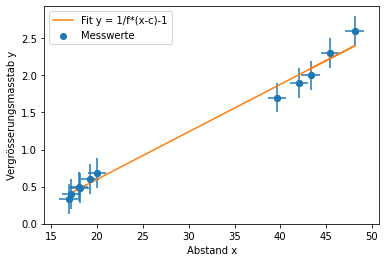

In [296]:
def gamma_inverse(x,f,c):
    gamma_inv = 1/f*(x-c)-1
    return gamma_inv
u_gamma = np.ones(len(gamma))*0.2
popt, pcov = curve_fit(gamma_inverse, x, gamma, sigma=u_gamma)
u_fit = (pcov[0,0]**0.5,pcov[1,1]**0.5)
print("f = ", popt[0],"+/-", u_fit[0], ", c = ", -popt[1],"+/-", u_fit[1])
plt.scatter(x,gamma, label="Messwerte")
plt.errorbar(x, gamma, xerr=1, yerr=u_gamma,fmt='o')
plt.plot(x, gamma_inverse(x, *popt), label="Fit y = 1/f*(x-c)-1")
plt.xlabel("Abstand x")
plt.ylabel("Vergrösserungsmasstab y")
plt.legend(loc="upper left")
plt.savefig("x_Fit.pdf")

R^2 = 0.9861033806828677


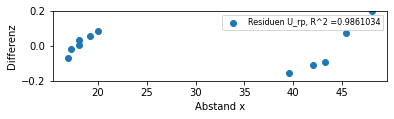

In [297]:
#Residuen
y = gamma
residuals = y - gamma_inverse(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
R_2 = 1 - (ss_res / ss_tot)
plt.scatter(x,residuals, label='Residuen U_rp, R^2 ='+str(np.round(R_2,7)))
plt.xlabel("Abstand x")
plt.ylabel("Differenz")
plt.ylim(-0.2, 0.2)
plt.legend(loc="upper right", prop={'size': 8})
plt.gca().set_aspect(aspect=18)
#plt.rcParams["figure.figsize"] = (8,1)
plt.savefig("Residuen_Gamma.pdf", bbox_inches = "tight")
print("R^2 =", R_2)

f' =  13.828913961397966 +/- 0.41498551949803636 , c' =  8.930245731296418 +/- 1.3717918247933074


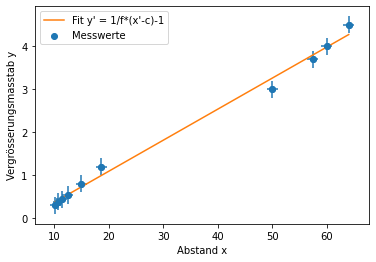

In [298]:
u_gamma = np.ones(len(gamma_invers))*0.2
popt, pcov = curve_fit(gamma_inverse, x_invers, gamma_invers, sigma=u_gamma)
u_fit = (pcov[0,0]**0.5,pcov[1,1]**0.5)
print("f' = ", popt[0],"+/-", u_fit[0], ", c' = ", -popt[1],"+/-", u_fit[1])
plt.scatter(x_invers,gamma_invers, label="Messwerte")
plt.errorbar(x_invers, gamma_invers, xerr=1, yerr=u_gamma,fmt='o')
plt.plot(x_invers, gamma_inverse(x_invers, *popt), label="Fit y' = 1/f*(x'-c)-1")
plt.xlabel("Abstand x")
plt.ylabel("Vergrösserungsmasstab y")
plt.legend(loc="upper left")
plt.savefig("Gamma_Invers_Fit.pdf")

R^2 = 0.9928474287932816


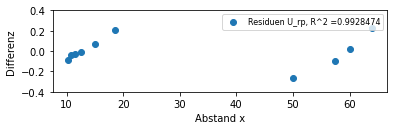

In [299]:
#Residuen
y = gamma_invers
x = x_invers
residuals = y - gamma_inverse(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
R_2 = 1 - (ss_res / ss_tot)
plt.scatter(x,residuals, label='Residuen U_rp, R^2 ='+str(np.round(R_2,7)))
plt.xlabel("Abstand x")
plt.ylabel("Differenz ")
plt.ylim(-0.4, 0.4)
plt.legend(loc="upper right", prop={'size': 8})
plt.gca().set_aspect(aspect=18)
#plt.rcParams["figure.figsize"] = (8,1)
plt.savefig("Residuen_Gamma_Invers.pdf", bbox_inches = "tight")
print("R^2 =", R_2)

In [304]:
(15.585+13.82891)/2

14.706955

In [307]:
a = 4.897956500562235+8.930245731296418
u_a = np.sqrt(1.3717918247933074**2+1.4640865215131416**2)
print("a = ", a, "+/-", u_a)

a =  13.828202231858654 +/- 2.0063305193926055
